# 세그먼트 종합 시각화: 연령대×성별×업종

## 📊 분석 개요

본 분석은 **연령대, 성별, 업종 카테고리를 통합한 다차원 세그먼트 특성**을 시각화하여, 각 업종별 주요 고객층을 파악하고 마케팅 전략 수립에 활용 가능한 인사이트를 도출합니다.

---

## 📁 데이터 출처

**파일명**: `big_data_merged.csv`  
**경로**: `/Users/yeong-gwang/Documents/배움 오전 1.38.42/외부/공모전/빅콘테스트/Project/work/ver3_/1012/data/big_data_merged.csv`  
**데이터 규모**: 86,590개 관측치 × 38개 변수

### 원본 데이터 구조

| 컬럼명 | 설명 | 데이터 타입 | 예시 |
|--------|------|------------|------|
| `ENCODED_MCT` | 가맹점 ID (익명화) | 문자열 | "MCT_12345" |
| `TA_YM` | 기준년월 | 문자열 | "202301" |
| `HPSN_MCT_ZCD_NM` | 업종명 (73개 세부 업종) | 문자열 | "한식-육류/고기", "카페" |
| `M12_MAL_1020_RAT` | 남성 10~20대 비율 (%) | 실수 | 15.3 |
| `M12_MAL_30_RAT` | 남성 30대 비율 (%) | 실수 | 20.1 |
| `M12_MAL_40_RAT` | 남성 40대 비율 (%) | 실수 | 18.5 |
| `M12_MAL_50_RAT` | 남성 50대 비율 (%) | 실수 | 12.4 |
| `M12_MAL_60_RAT` | 남성 60대이상 비율 (%) | 실수 | 8.2 |
| `M12_FME_1020_RAT` | 여성 10~20대 비율 (%) | 실수 | 12.8 |
| `M12_FME_30_RAT` | 여성 30대 비율 (%) | 실수 | 15.6 |
| `M12_FME_40_RAT` | 여성 40대 비율 (%) | 실수 | 10.3 |
| `M12_FME_50_RAT` | 여성 50대 비율 (%) | 실수 | 7.9 |
| `M12_FME_60_RAT` | 여성 60대이상 비율 (%) | 실수 | 4.5 |

**특징**:
- 성별×연령대 비율의 합은 약 100%를 이룸 (각 가맹점의 고객 구성 비율)
- 결측값은 `-999999.9`로 표시됨
- 일부 가맹점은 성별/연령대 데이터 없음

---

## 🔧 데이터 처리 과정

### 1단계: 업종 분류 (73개 → 16개 카테고리)

**목적**: 배달앱 표준 분류 기준에 맞춰 업종을 13개 주요 카테고리 + 3개 기타 카테고리로 통합

**분류 함수**: `assign_category(industry_name)`

#### 주요 카테고리 (13개) - 음식점 중심
1. **치킨**: '치킨' 키워드 포함
2. **카페/디저트**: 카페, 커피, 베이커리, 아이스크림, 빙수, 도너츠, 마카롱, 와플, 크로플, 차, 주스, 탕후루
3. **피자**: '피자' 키워드 포함
4. **한식**: 한식, 백반, 가정식, 한정식, 국수, 만두, 찌개, 전골, 냉면, 죽, 두부, 구내식당, 푸드코트, 기사식당, 민속주점, 육류, 고기, 해물, 생선, 국밥, 설렁탕
5. **버거**: 햄버거, 버거
6. **중식**: '중식' 키워드 포함
7. **분식**: '분식' 키워드 포함
8. **회/일식/돈까스**: 일식, 회, 초밥, 사시미, 돈가스, 덮밥, 이자카야, 오뎅, 라멘, 우동, 소바
9. **도시락**: '도시락' 키워드 포함
10. **찜/탕**: 찜, 탕 (단, 국밥/설렁탕 제외)
11. **족발/보쌈**: 족발, 보쌈
12. **양식/아시안**: 양식, 스테이크, 파스타, 레스토랑, 동남아, 인도, 타이, 베트남, 멕시칸, 터키, 퓨전
13. **샐러드/채식**: 샐러드, 채식, 샌드위치, 토스트

#### 기타 카테고리 (3개) - 비음식점
- **기타-축산물**: 식자재 판매업 (6,236개)
- **기타-주점/포장마차**: 요리주점, 포장마차, 호프, 맥주, 유흥주점, 와인바, 룸살롱, 단란주점 (5,447개)
- **기타-기타**: 나머지 (9,016개)

**결과**:
```
1.치킨           2,938개 (3.39%)
2.카페/디저트      15,975개 (18.45%)
3.피자           1,123개 (1.30%)
4.한식          30,332개 (35.03%)
5.버거            612개 (0.71%)
6.중식           2,279개 (2.63%)
7.분식           2,867개 (3.31%)
8.회/일식/돈까스     4,590개 (5.30%)
9.도시락           175개 (0.20%)
10.찜/탕          296개 (0.34%)
12.양식/아시안      4,072개 (4.70%)
13.샐러드/채식       632개 (0.73%)
기타-축산물         6,236개 (7.20%)
기타-주점/포장마차     5,447개 (6.29%)
기타-기타          9,016개 (10.41%)
```

---

### 2단계: 성별/연령대 데이터 정제

**문제점**:
- 결측값: `-999999.9`
- 범위 오류: 0~100% 범위를 벗어나는 값 존재

**처리 방법**:
```python
# 1. 결측값 처리: -999999.9 → NaN
df[col] = df[col].replace(-999999.9, np.nan)

# 2. 유효 범위 필터링: 0~100% 범위만 유지
df[col] = df[col].apply(lambda x: x if (pd.notna(x) and 0 <= x <= 100) else np.nan)

# 3. 성별 총 비율 계산
df['남성_비율'] = df[gender_cols_male].sum(axis=1)  # 5개 연령대 합계
df['여성_비율'] = df[gender_cols_female].sum(axis=1)

# 4. 유효 데이터 필터링: 성별 데이터가 있는 관측치만 선택
df_segment = df[((df['남성_비율'] > 0) | (df['여성_비율'] > 0))].copy()
```

**결과**:
- 전체 데이터: 86,590개
- 성별 데이터 있음: 84,586개 (97.69%)
- 제외된 데이터: 2,004개 (2.31%)

---

### 3단계: 세그먼트 데이터 구축 (Long Format 변환)

**목적**: 각 가맹점의 성별×연령대 비율 데이터를 행(row) 단위로 분해하여 분석 가능한 형태로 변환

**변환 로직**:
```python
# 원본 데이터 (Wide Format):
# 가맹점A | 한식 | 남성10~20대: 15% | 남성30대: 20% | ... | 여성60대이상: 5%

# 변환 후 데이터 (Long Format):
# 가맹점A | 한식 | 남성 | 10~20대 | 15%
# 가맹점A | 한식 | 남성 | 30대    | 20%
# ...
# 가맹점A | 한식 | 여성 | 60대이상 | 5%
```

**Python 코드**:
```python
segment_list = []

for idx, row in df_segment.iterrows():
    업종 = row['업종분류']
    
    # 남성 5개 연령대
    for i, age_col in enumerate(['M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 
                                  'M12_MAL_40_RAT', 'M12_MAL_50_RAT', 
                                  'M12_MAL_60_RAT']):
        val = row[age_col]
        if pd.notna(val) and val > 0:
            age_group = ['10~20대', '30대', '40대', '50대', '60대이상'][i]
            segment_list.append({
                '업종': 업종, 
                '성별': '남성', 
                '연령대': age_group, 
                '비율': val
            })
    
    # 여성 5개 연령대 (동일 로직)
    ...

df_seg = pd.DataFrame(segment_list)
```

**결과**:
- 총 세그먼트 레코드 수: 800,227개
- 업종 수: 15개 (11.족발/보쌈 제외)
- 세그먼트 조합: 업종(15) × 성별(2) × 연령대(5) = 최대 150개 조합

---

### 4단계: 세그먼트별 집계 통계

**집계 로직**:
```python
segment_summary = df_seg.groupby(['업종', '성별', '연령대']).agg({
    '비율': ['mean', 'count']  # 평균 비율, 관측치 수
}).reset_index()

segment_summary.columns = ['업종', '성별', '연령대', '평균_비율', '관측치수']
```

**결과 예시** (치킨 업종):
| 업종 | 성별 | 연령대 | 평균_비율 | 관측치수 |
|------|------|--------|-----------|----------|
| 1.치킨 | 남성 | 10~20대 | 11.32% | 2,871 |
| 1.치킨 | 남성 | 30대 | 13.07% | 2,914 |
| 1.치킨 | 남성 | 40대 | 12.74% | 2,918 |
| 1.치킨 | 남성 | 50대 | 15.32% | 2,910 |
| 1.치킨 | 남성 | 60대이상 | 10.55% | 2,910 |
| 1.치킨 | 여성 | 10~20대 | 7.02% | 2,871 |
| ... | ... | ... | ... | ... |

**해석**:
- 치킨은 **남성 50대**가 가장 높은 비율 (15.32%)
- 여성보다 남성 비율이 전반적으로 높음 (남성 선호 업종)

---

### 5단계: 분석 대상 필터링 (13개 주요 카테고리)

**목적**: 마케팅 활용도가 높은 음식점 카테고리에 집중

**필터링**:
```python
main_categories = ['1.치킨', '2.카페/디저트', '3.피자', '4.한식', '5.버거', 
                   '6.중식', '7.분식', '8.회/일식/돈까스', '9.도시락', 
                   '10.찜/탕', '11.족발/보쌈', '12.양식/아시안', '13.샐러드/채식']

df_main = segment_summary[segment_summary['업종'].isin(main_categories)].copy()
available_categories = sorted([c for c in main_categories 
                               if c in df_main['업종'].unique()])
```

**결과**:
- 데이터가 있는 카테고리: 12개 (11.족발/보쌈 제외)
- 분석 대상 세그먼트: 12개 업종 × 2개 성별 × 5개 연령대 = 120개

---

### 6단계: 피벗 테이블 생성

#### 6-1. 성별 피벗 (`gender_pivot`)
```python
gender_by_cat = df_seg.groupby(['업종', '성별'])['비율'].mean().reset_index()
gender_pivot = gender_by_cat.pivot(index='업종', columns='성별', values='비율')
```

**결과 예시**:
| 업종 | 남성 | 여성 |
|------|------|------|
| 1.치킨 | 12.60% | 7.56% |
| 4.한식 | 12.95% | 7.63% |
| 12.양식/아시안 | 9.34% | 11.36% |

#### 6-2. 연령대 피벗 (`age_pivot`)
```python
age_by_cat = df_seg.groupby(['업종', '연령대'])['비율'].mean().reset_index()
age_pivot = age_by_cat.pivot(index='업종', columns='연령대', values='비율')
age_pivot = age_pivot[age_order]  # 연령대 순서 정렬
```

**결과 예시**:
| 업종 | 10~20대 | 30대 | 40대 | 50대 | 60대이상 |
|------|---------|------|------|------|----------|
| 1.치킨 | 9.17% | 10.55% | 10.30% | 12.14% | 8.25% |
| 9.도시락 | 18.11% | 11.94% | 10.00% | 6.77% | 3.22% |

---

## 📈 시각화 구성 (17개 섹션)

### 기본 분석 (섹션 1-9)
1. **업종별 성별×연령대 히트맵**: 120개 세그먼트의 전체 분포
2. **업종별 성별 비중**: 남성/여성 비율 비교 (Stacked Bar)
3. **업종별 연령대 분포**: 5개 연령대 비율 비교 (Stacked Bar)
4. **성별×연령대별 주요 업종 Top 5**: 10개 세그먼트별 인기 업종
5. **업종별 세그먼트 다양성**: 표준편차 기반 다양성 측정
6. **종합 통계**: 세그먼트별 관측치 수, Top 3 업종
7. **주요 발견사항**: 인사이트 요약

### 마케팅 전략 분석 (섹션 14-20)
8. **업종별 세그먼트 크기**: 시장 규모 참고 지표
9. **업종별 연령대 프로필 (레이더 차트)**: Top 3 업종 프로필 비교
10. **세그먼트별 업종 다양성**: Top 3 집중도 측정
11. **세그먼트 비중 히트맵 (정규화)**: 업종 내 세그먼트 비중
12. **마케팅 전략 매트릭스**: 시장크기 × 다양성 2차원 분석
13. **마케팅 활용 인사이트 요약**: 시각화별 활용 방안

### 추가 시각화 (섹션 21-30)
14. **업종별 세그먼트 분포 (바이올린 플롯)**: 분포 형태 비교
15. **업종 3D 포지셔닝**: 시장크기 × 성별편중 × 연령집중

---

## 🔑 핵심 지표 정의

### 1. 평균 비율 (`평균_비율`)
- **계산**: 해당 세그먼트 비율의 평균값
- **예시**: 치킨 업종의 남성 50대 평균 비율 = 15.32%
- **해석**: 치킨 가맹점 고객 중 남성 50대가 평균 15.32% 차지

### 2. 성별 편중도 (`bias`)
- **계산**: 남성 평균 비율 - 여성 평균 비율
- **예시**: 치킨 = 12.60% - 7.56% = 5.04% (남성 편중)
- **분류**:
  - `bias > 5%`: 남성 선호
  - `bias < -5%`: 여성 선호
  - `-5% ≤ bias ≤ 5%`: 중립

### 3. 연령 집중도 (`concentration_val`)
- **계산**: 최대 연령대 비율 - 2위 연령대 비율
- **예시**: 도시락 = 18.11% (10~20대) - 11.94% (30대) = 6.17% (높은 집중)
- **분류**:
  - `concentration > 5%`: 높음 (특정 연령대 집중)
  - `2% < concentration ≤ 5%`: 중간
  - `concentration ≤ 2%`: 낮음 (고르게 분포)

### 4. 세그먼트 다양성 (`표준편차`)
- **계산**: 업종 내 120개 세그먼트 평균 비율의 표준편차
- **예시**: 도시락 = 6.99 (높음), 분식 = 2.88 (낮음)
- **해석**: 
  - 높음: 특정 세그먼트에 집중 (타겟팅 명확)
  - 낮음: 모든 세그먼트에 고르게 분포 (대중적)

### 5. Top3 집중도
- **계산**: 상위 3개 세그먼트 평균 비율 합계
- **예시**: 남성 10~20대 = 61.95% (도시락 + 버거 + 회/일식)
- **해석**: 3개 업종이 해당 세그먼트의 61.95% 차지 (높은 집중)

---

## 📝 데이터 품질 및 제약사항

### 데이터 품질
✅ **우수**:
- 전체 데이터 중 97.69%가 성별/연령대 정보 보유
- 13개 주요 카테고리 모두 충분한 관측치 확보 (최소 175개)

⚠️ **제약**:
- 족발/보쌈 카테고리 데이터 없음 (0개)
- 기타 카테고리는 분석 대상에서 제외

### 해석 시 유의사항
1. **평균 비율의 의미**: 가맹점별 고객 구성 비율의 평균이므로, 실제 고객 수와는 다를 수 있음
2. **관측치수**: 각 세그먼트의 데이터 신뢰도 지표 (많을수록 신뢰도 높음)
3. **시간 단위**: 월별 데이터이므로 계절성 영향 고려 필요
4. **지역 한정**: 특정 지역(성동구) 데이터이므로 전국 일반화 시 주의

---

## 🎯 분석 활용 방안

### 마케팅 전략 수립
1. **타겟팅**: 업종별 핵심 고객 세그먼트 파악 → 광고 타게팅 설정
2. **메시지 개발**: 성별/연령대별 선호도 기반 마케팅 메시지 차별화
3. **채널 선택**: 세그먼트별 미디어 이용 행태 고려한 채널 전략

### 사업 전략 수립
1. **입지 선정**: 목표 고객층이 밀집한 지역 선정
2. **메뉴 구성**: 주력 세그먼트 선호 메뉴 중심 구성
3. **가격 전략**: 타겟 세그먼트의 구매력 고려

### 정책 활용
1. **소상공인 지원**: 업종별 주력 세그먼트 정보 제공
2. **상권 분석**: 지역별 업종 적합도 평가
3. **폐업 위험도 예측**: 세그먼트 편중도를 위험 요인으로 활용

---

이제 데이터를 로드하고 분석을 시작합니다.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

data_path = '/Users/yeong-gwang/Documents/배움 오전 1.38.42/외부/공모전/빅콘테스트/Project/work/ver3_/1012/data/big_data_merged.csv'
df = pd.read_csv(data_path, encoding='utf-8', low_memory=False)

df.shape

(86590, 38)

## 1. 데이터 전처리

In [2]:
def assign_category(industry_name):
    if pd.isna(industry_name):
        return '기타-기타'
    
    if '치킨' in industry_name:
        return '1.치킨'
    
    cafe_keywords = ['카페', '커피', '베이커리', '아이스크림', '빙수', '도너츠', '마카롱', '와플', '크로플', '차', '주스', '탕후루']
    if any(keyword in industry_name for keyword in cafe_keywords):
        return '2.카페/디저트'
    
    if '피자' in industry_name:
        return '3.피자'
    
    if '햄버거' in industry_name or '버거' in industry_name:
        return '5.버거'
    
    if '중식' in industry_name:
        return '6.중식'
    
    if '분식' in industry_name:
        return '7.분식'
    
    japanese_keywords = ['일식', '회', '초밥', '사시미', '돈가스', '덮밥', '이자카야', '오뎅', '라멘', '우동', '소바']
    if any(keyword in industry_name for keyword in japanese_keywords):
        return '8.회/일식/돈까스'
    
    if '도시락' in industry_name:
        return '9.도시락'
    
    if '족발' in industry_name or '보쌈' in industry_name:
        return '11.족발/보쌈'
    
    western_keywords = ['양식', '스테이크', '파스타', '레스토랑', '동남아', '인도', '타이', '베트남', '멕시칸', '터키', '퓨전']
    if any(keyword in industry_name for keyword in western_keywords):
        return '12.양식/아시안'
    
    salad_keywords = ['샐러드', '채식', '샌드위치', '토스트']
    if any(keyword in industry_name for keyword in salad_keywords):
        return '13.샐러드/채식'
    
    if '축산물' in industry_name:
        return '기타-축산물'
    
    jujeom_keywords = ['요리주점', '포장마차', '호프', '맥주', '유흥주점', '와인바', '룸살롱', '단란주점']
    if any(keyword in industry_name for keyword in jujeom_keywords):
        return '기타-주점/포장마차'
    
    jjim_keywords = ['찜', '탕']
    if any(keyword in industry_name for keyword in jjim_keywords):
        if '국밥' not in industry_name and '설렁탕' not in industry_name:
            return '10.찜/탕'
    
    korean_keywords = ['한식', '백반', '가정식', '한정식', '국수', '만두', '찌개', '전골', '냉면', '죽', '두부', '구내식당', '푸드코트', '기사식당', '민속주점', '육류', '고기', '해물', '생선', '국밥', '설렁탕']
    if any(keyword in industry_name for keyword in korean_keywords):
        return '4.한식'
    
    return '기타-기타'

df['업종분류'] = df['HPSN_MCT_ZCD_NM'].apply(assign_category)

df['업종분류'].value_counts().sort_index()

업종분류
1.치킨           2938
10.찜/탕          296
12.양식/아시안      4072
13.샐러드/채식       632
2.카페/디저트      15975
3.피자           1123
4.한식          30332
5.버거            612
6.중식           2279
7.분식           2867
8.회/일식/돈까스     4590
9.도시락           175
기타-기타          9016
기타-주점/포장마차     5447
기타-축산물         6236
Name: count, dtype: int64

In [3]:
gender_cols_male = ['M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT', 'M12_MAL_50_RAT', 'M12_MAL_60_RAT']
gender_cols_female = ['M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT', 'M12_FME_50_RAT', 'M12_FME_60_RAT']

for col in gender_cols_male + gender_cols_female:
    df[col] = df[col].replace(-999999.9, np.nan)
    df[col] = df[col].apply(lambda x: x if (pd.notna(x) and 0 <= x <= 100) else np.nan)

df['남성_비율'] = df[gender_cols_male].sum(axis=1)
df['여성_비율'] = df[gender_cols_female].sum(axis=1)

df_segment = df[((df['남성_비율'] > 0) | (df['여성_비율'] > 0))].copy()

pd.DataFrame({
    '구분': ['전체 데이터', '성별 데이터 있음'],
    '개수': [len(df), len(df_segment)]
})

,구분,개수
0,전체 데이터,86590
1,성별 데이터 있음,84586


## 2. 세그먼트 데이터 구축

In [4]:
segment_list = []

for idx, row in df_segment.iterrows():
    업종 = row['업종분류']
    
    for i, age_col in enumerate(['M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT', 'M12_MAL_50_RAT', 'M12_MAL_60_RAT']):
        val = row[age_col]
        if pd.notna(val) and val > 0:
            age_group = ['10~20대', '30대', '40대', '50대', '60대이상'][i]
            segment_list.append({'업종': 업종, '성별': '남성', '연령대': age_group, '비율': val})
    
    for i, age_col in enumerate(['M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT', 'M12_FME_50_RAT', 'M12_FME_60_RAT']):
        val = row[age_col]
        if pd.notna(val) and val > 0:
            age_group = ['10~20대', '30대', '40대', '50대', '60대이상'][i]
            segment_list.append({'업종': 업종, '성별': '여성', '연령대': age_group, '비율': val})

df_seg = pd.DataFrame(segment_list)

pd.DataFrame({
    '구분': ['총 세그먼트 레코드 수', '업종 수'],
    '값': [len(df_seg), df_seg['업종'].nunique()]
})

,구분,값
0,총 세그먼트 레코드 수,800227
1,업종 수,15


In [5]:
segment_summary = df_seg.groupby(['업종', '성별', '연령대']).agg({
    '비율': ['mean', 'count']
}).reset_index()

segment_summary.columns = ['업종', '성별', '연령대', '평균_비율', '관측치수']
segment_summary = segment_summary.sort_values(['업종', '성별', '연령대'])

segment_summary.head(20)

,업종,성별,연령대,평균_비율,관측치수
0,1.치킨,남성,10~20대,11.317584,2871
1,1.치킨,남성,30대,13.070178,2914
2,1.치킨,남성,40대,12.743917,2918
3,1.치킨,남성,50대,15.322197,2910
4,1.치킨,남성,60대이상,10.551812,2910
5,1.치킨,여성,10~20대,7.022716,2871
6,1.치킨,여성,30대,8.028341,2904
7,1.치킨,여성,40대,7.849639,2908
8,1.치킨,여성,50대,8.945845,2899
9,1.치킨,여성,60대이상,5.932986,2899


## 3. 시각화 1: 업종별 성별×연령대 히트맵

In [6]:
main_categories = ['1.치킨', '2.카페/디저트', '3.피자', '4.한식', '5.버거', '6.중식', '7.분식',
                   '8.회/일식/돈까스', '9.도시락', '10.찜/탕', '11.족발/보쌈', '12.양식/아시안', '13.샐러드/채식']

df_main = segment_summary[segment_summary['업종'].isin(main_categories)].copy()
available_categories = sorted([c for c in main_categories if c in df_main['업종'].unique()])

pd.DataFrame({
    '구분': ['데이터가 있는 주요 카테고리 수'],
    '개수': [len(available_categories)]
})

,구분,개수
0,데이터가 있는 주요 카테고리 수,12


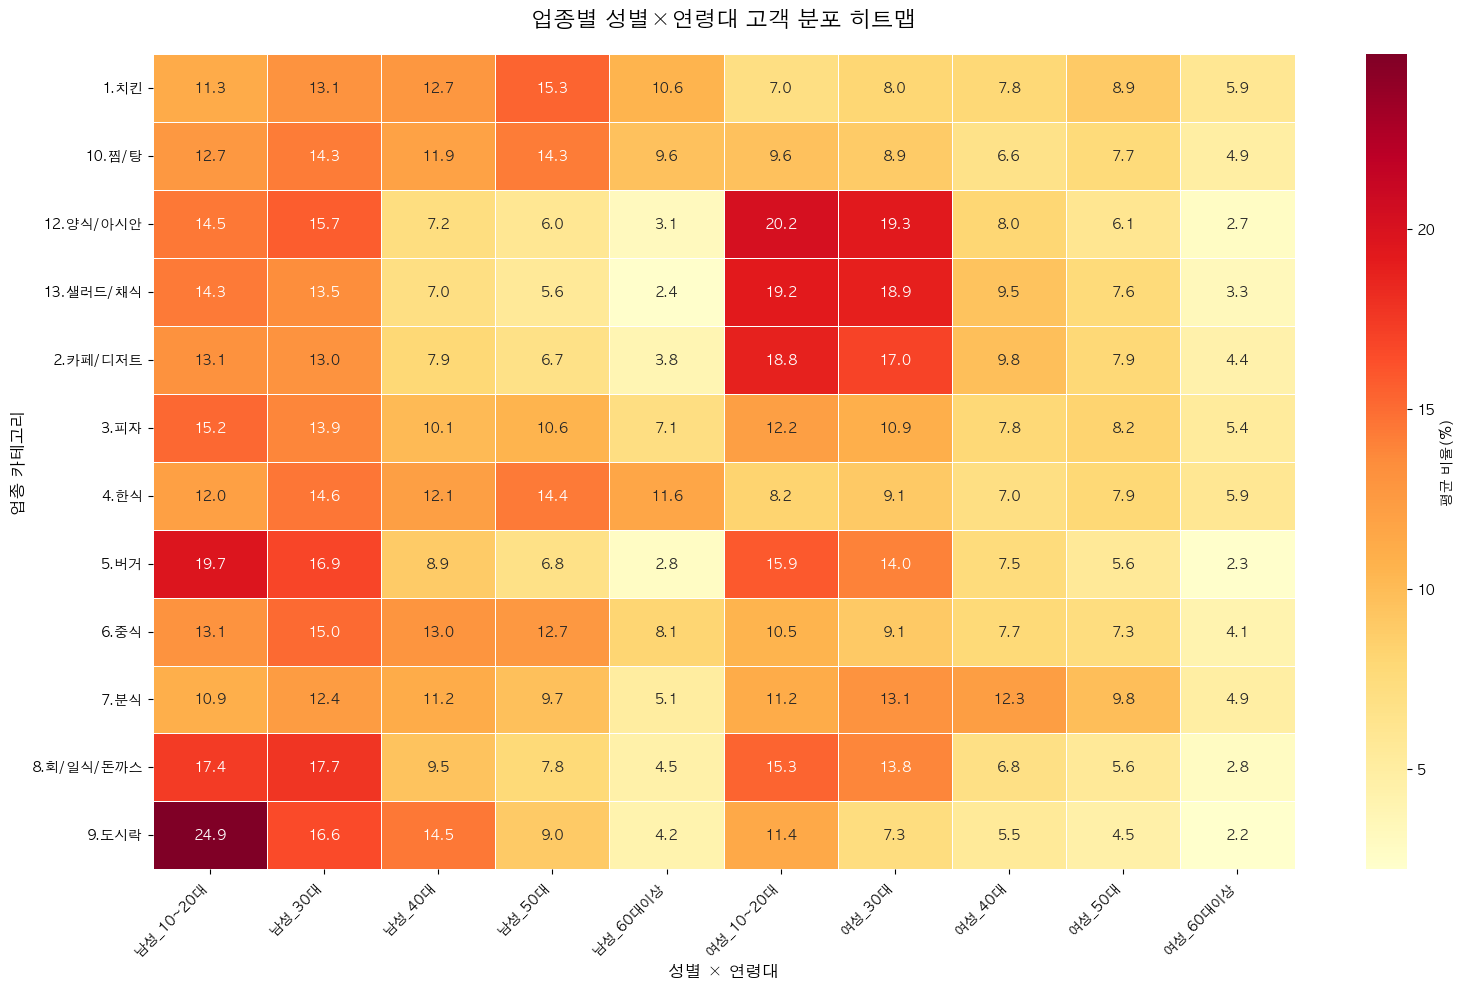

In [7]:
age_order = ['10~20대', '30대', '40대', '50대', '60대이상']
gender_age_labels = []
for gender in ['남성', '여성']:
    for age in age_order:
        gender_age_labels.append(f'{gender}_{age}')

heatmap_data = []
for cat in available_categories:
    cat_data = df_main[df_main['업종'] == cat]
    row = []
    for gender in ['남성', '여성']:
        for age in age_order:
            val = cat_data[(cat_data['성별'] == gender) & (cat_data['연령대'] == age)]['평균_비율']
            row.append(val.values[0] if len(val) > 0 else 0)
    heatmap_data.append(row)

heatmap_df = pd.DataFrame(heatmap_data, columns=gender_age_labels, index=available_categories)

fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(heatmap_df, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': '평균 비율(%)'}, ax=ax, linewidths=0.5)

ax.set_title('업종별 성별×연령대 고객 분포 히트맵', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('성별 × 연령대', fontsize=12)
ax.set_ylabel('업종 카테고리', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. 시각화 2: 업종별 성별 비중

In [8]:
gender_by_cat = df_seg.groupby(['업종', '성별'])['비율'].mean().reset_index()
gender_by_cat_main = gender_by_cat[gender_by_cat['업종'].isin(available_categories)]

gender_pivot = gender_by_cat_main.pivot(index='업종', columns='성별', values='비율')
gender_pivot = gender_pivot.reindex(available_categories)

gender_pivot

성별,남성,여성
업종,,
1.치킨,12.604792,7.557282
10.찜/탕,12.540893,7.518127
12.양식/아시안,9.343083,11.358581
13.샐러드/채식,8.635684,11.787206
2.카페/디저트,8.932119,11.552178
3.피자,11.377056,8.911939
4.한식,12.947504,7.629578
5.버거,11.032074,9.092662
6.중식,12.362388,7.760458


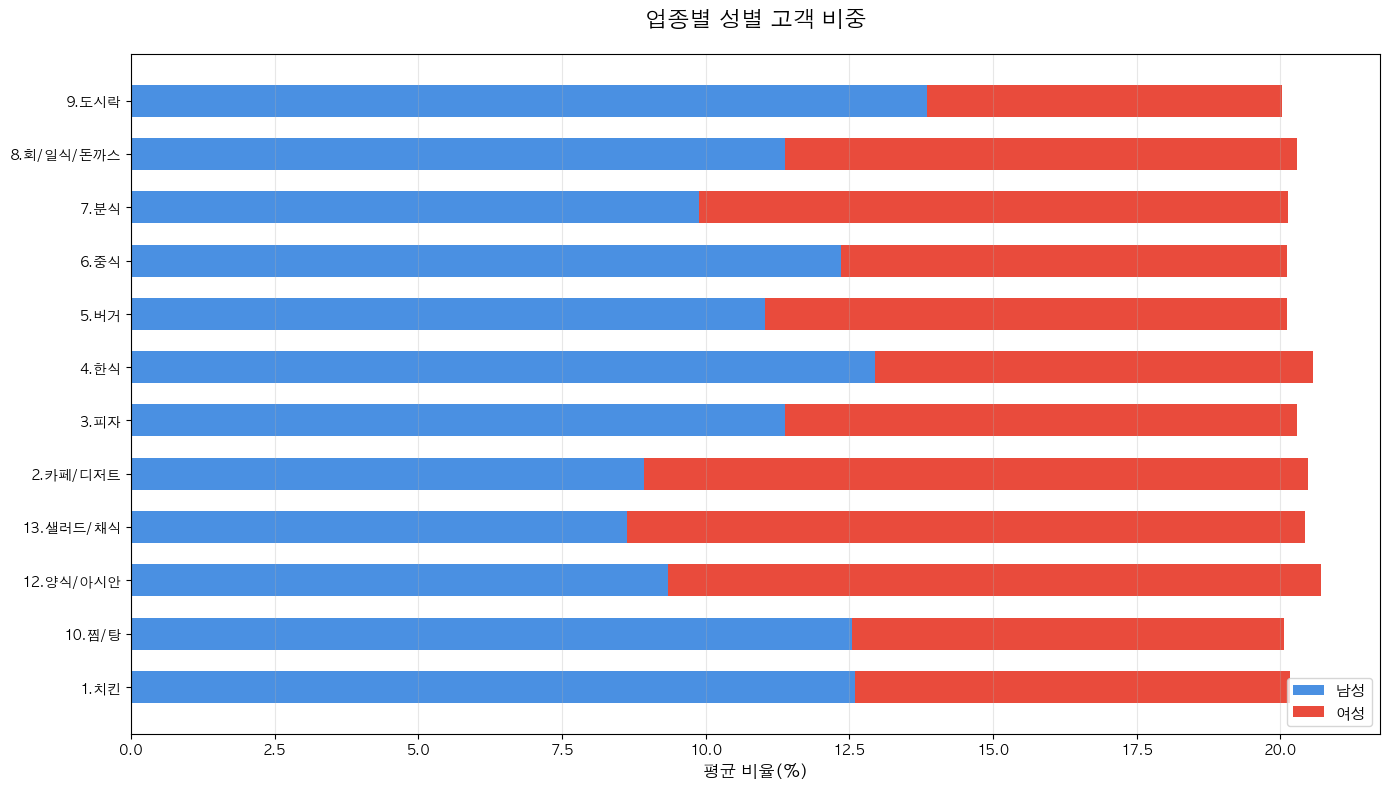

In [9]:
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(available_categories))
width = 0.6

ax.barh(x, gender_pivot['남성'], width, label='남성', color='#4A90E2')
ax.barh(x, gender_pivot['여성'], width, left=gender_pivot['남성'], label='여성', color='#E94B3C')

ax.set_yticks(x)
ax.set_yticklabels(available_categories)
ax.set_xlabel('평균 비율(%)', fontsize=12)
ax.set_title('업종별 성별 고객 비중', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. 시각화 3: 업종별 연령대 분포

In [10]:
age_by_cat = df_seg.groupby(['업종', '연령대'])['비율'].mean().reset_index()
age_by_cat_main = age_by_cat[age_by_cat['업종'].isin(available_categories)]

age_pivot = age_by_cat_main.pivot(index='업종', columns='연령대', values='비율')
age_pivot = age_pivot.reindex(available_categories)
age_pivot = age_pivot[age_order]

age_pivot

연령대,10~20대,30대,40대,50대,60대이상
업종,,,,,
1.치킨,9.170150,10.553592,10.300978,12.140059,8.246772
10.찜/탕,11.126146,11.581293,9.250340,10.975340,7.216837
12.양식/아시안,17.344011,17.506377,7.589212,6.026350,2.944338
13.샐러드/채식,16.765391,16.214711,8.240982,6.617420,2.855071
2.카페/디저트,15.933958,14.988277,8.863467,7.301063,4.127713
3.피자,13.671965,12.401102,8.944526,9.419880,6.256126
4.한식,10.140061,11.828221,9.580914,11.158624,8.781016
5.버거,17.781429,15.438474,8.177862,6.219646,2.577551
6.중식,11.797584,12.072233,10.329206,9.999007,6.082599


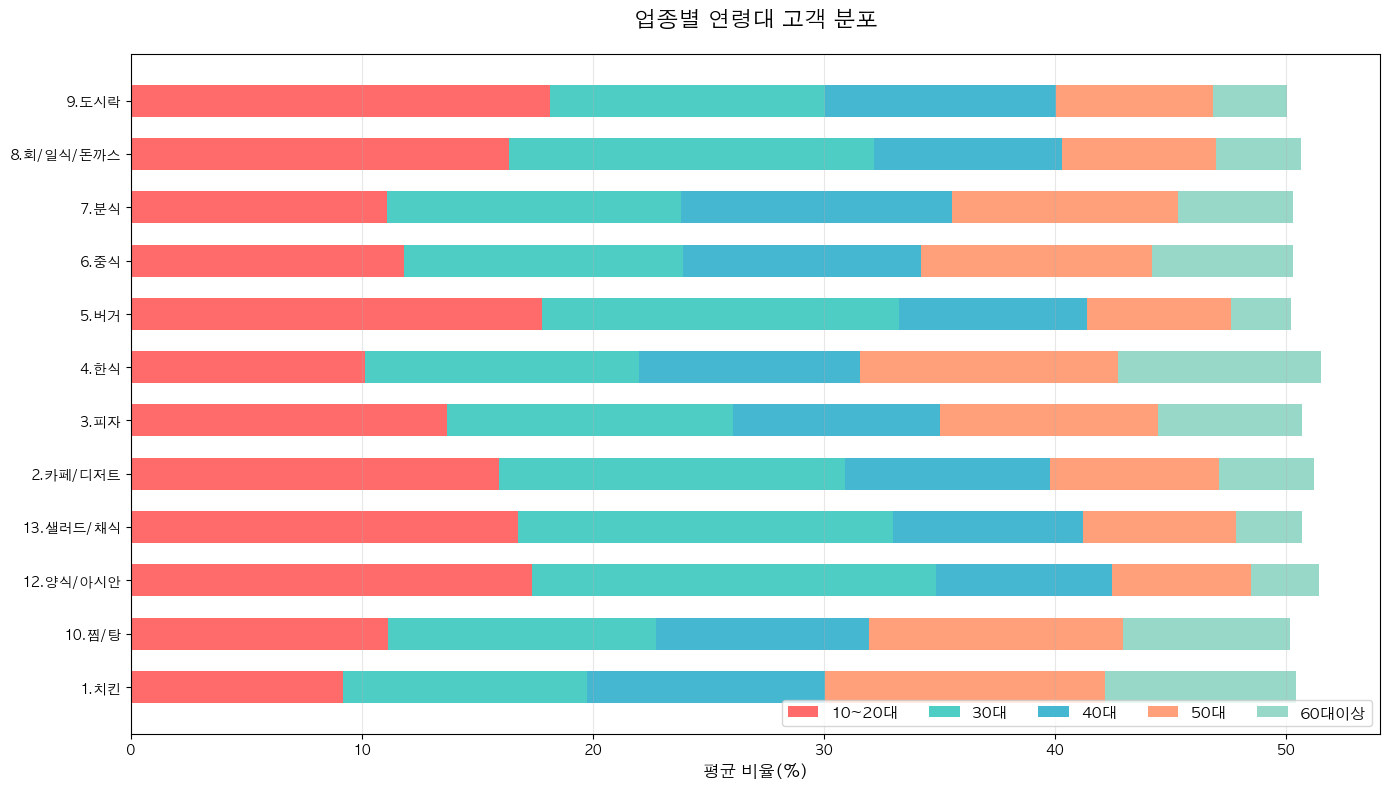

In [11]:
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(available_categories))
width = 0.6

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
bottom = np.zeros(len(available_categories))

for i, age in enumerate(age_order):
    values = age_pivot[age].values
    ax.barh(x, values, width, left=bottom, label=age, color=colors[i])
    bottom += values

ax.set_yticks(x)
ax.set_yticklabels(available_categories)
ax.set_xlabel('평균 비율(%)', fontsize=12)
ax.set_title('업종별 연령대 고객 분포', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11, ncol=5)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. 시각화 4: 성별×연령대 세그먼트별 주요 업종

In [12]:
segment_top = []

for gender in ['남성', '여성']:
    for age in age_order:
        seg_data = df_main[(df_main['성별'] == gender) & (df_main['연령대'] == age)]
        seg_data = seg_data.sort_values('평균_비율', ascending=False).head(5)
        
        for idx, row in seg_data.iterrows():
            segment_top.append({
                '세그먼트': f'{gender}_{age}',
                '업종': row['업종'],
                '평균_비율': row['평균_비율']
            })

df_seg_top = pd.DataFrame(segment_top)
df_seg_top.head(10)

,세그먼트,업종,평균_비율
0,남성_10~20대,9.도시락,24.853008
1,남성_10~20대,5.버거,19.680832
2,남성_10~20대,8.회/일식/돈까스,17.413687
3,남성_10~20대,3.피자,15.150446
4,남성_10~20대,12.양식/아시안,14.504007
5,남성_30대,8.회/일식/돈까스,17.691883
6,남성_30대,5.버거,16.881613
7,남성_30대,9.도시락,16.625724
8,남성_30대,12.양식/아시안,15.689135
9,남성_30대,6.중식,15.037696


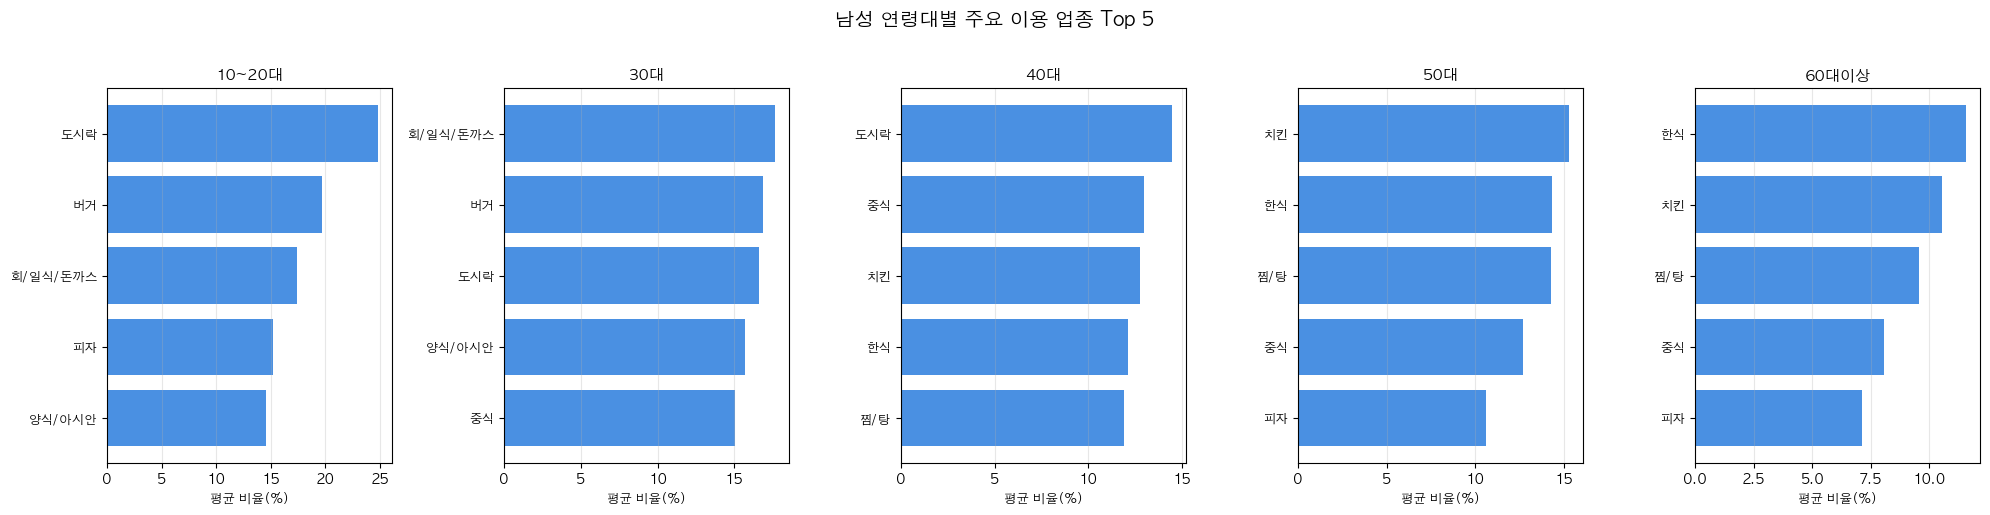

In [13]:
df_seg_top_male = df_seg_top[df_seg_top['세그먼트'].str.contains('남성')]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, age in enumerate(age_order):
    seg_name = f'남성_{age}'
    data = df_seg_top_male[df_seg_top_male['세그먼트'] == seg_name]
    
    if len(data) > 0:
        axes[i].barh(range(len(data)), data['평균_비율'], color='#4A90E2')
        axes[i].set_yticks(range(len(data)))
        axes[i].set_yticklabels(data['업종'].str.replace(r'^\d+\.', '', regex=True), fontsize=9)
        axes[i].set_xlabel('평균 비율(%)', fontsize=9)
        axes[i].set_title(age, fontsize=11, fontweight='bold')
        axes[i].invert_yaxis()
        axes[i].grid(axis='x', alpha=0.3)

fig.suptitle('남성 연령대별 주요 이용 업종 Top 5', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

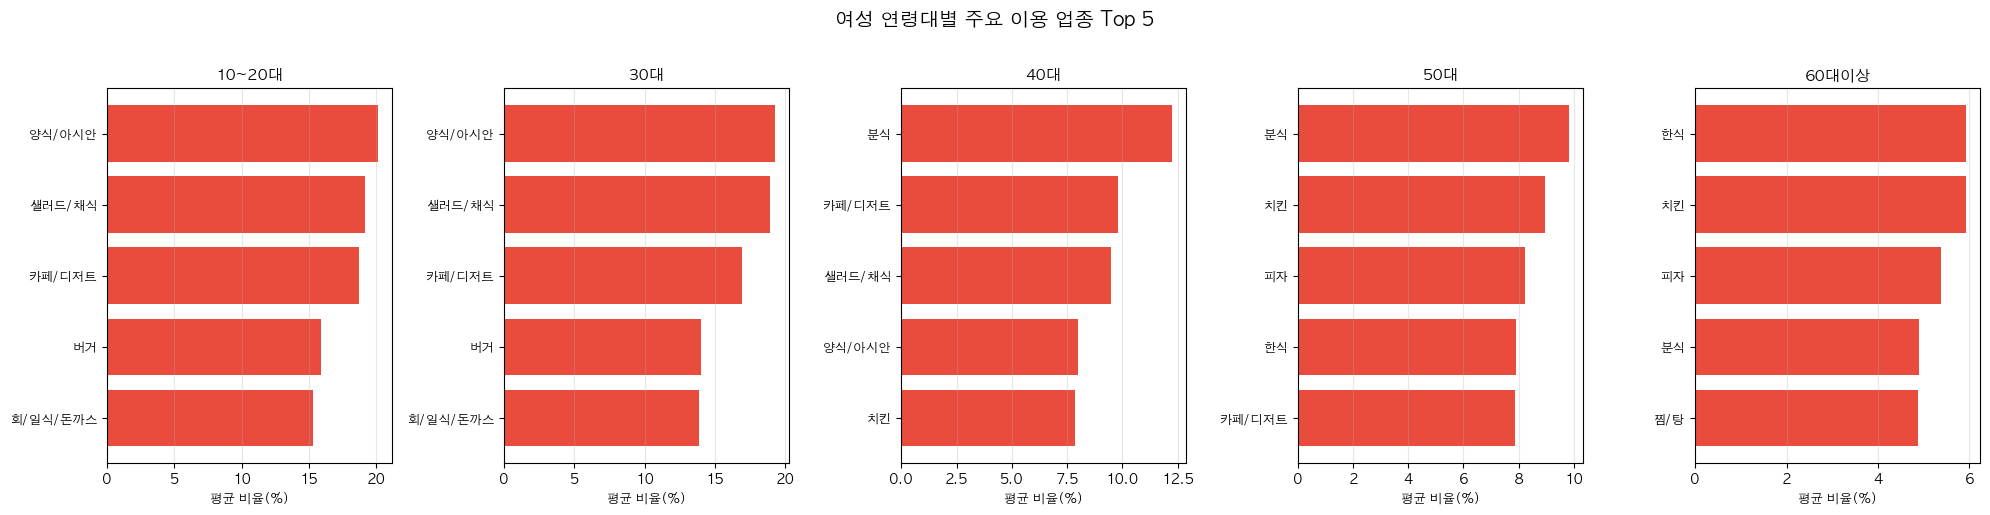

In [14]:
df_seg_top_female = df_seg_top[df_seg_top['세그먼트'].str.contains('여성')]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, age in enumerate(age_order):
    seg_name = f'여성_{age}'
    data = df_seg_top_female[df_seg_top_female['세그먼트'] == seg_name]
    
    if len(data) > 0:
        axes[i].barh(range(len(data)), data['평균_비율'], color='#E94B3C')
        axes[i].set_yticks(range(len(data)))
        axes[i].set_yticklabels(data['업종'].str.replace(r'^\d+\.', '', regex=True), fontsize=9)
        axes[i].set_xlabel('평균 비율(%)', fontsize=9)
        axes[i].set_title(age, fontsize=11, fontweight='bold')
        axes[i].invert_yaxis()
        axes[i].grid(axis='x', alpha=0.3)

fig.suptitle('여성 연령대별 주요 이용 업종 Top 5', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 7. 시각화 5: 업종별 세그먼트 다양성

In [15]:
diversity_by_cat = df_main.groupby('업종').agg({
    '평균_비율': ['mean', 'std', 'min', 'max']
}).reset_index()

diversity_by_cat.columns = ['업종', '전체_평균', '표준편차', '최소값', '최대값']
diversity_by_cat['범위'] = diversity_by_cat['최대값'] - diversity_by_cat['최소값']
diversity_by_cat = diversity_by_cat.sort_values('표준편차', ascending=False)

diversity_by_cat

,업종,전체_평균,표준편차,최소값,최대값,범위
11,9.도시락,10.008399,6.986527,2.211478,24.853008,22.641529
2,12.양식/아시안,10.281856,6.545461,2.747462,20.186204,17.438742
7,5.버거,10.038750,6.134663,2.347392,19.680832,17.333440
3,13.샐러드/채식,10.138635,6.069601,2.377470,19.202238,16.824768
10,8.회/일식/돈까스,10.123733,5.518357,2.835317,17.691883,14.856565
4,2.카페/디저트,10.242128,5.076201,3.848506,18.767907,14.919401
8,6.중식,10.057140,3.376032,4.107192,15.037696,10.930504
1,10.찜/탕,10.029464,3.203935,4.870428,14.292653,9.422225
5,3.피자,10.138637,3.071635,5.372583,15.150446,9.777863
6,4.한식,10.286613,3.059718,5.935164,14.570397,8.635233


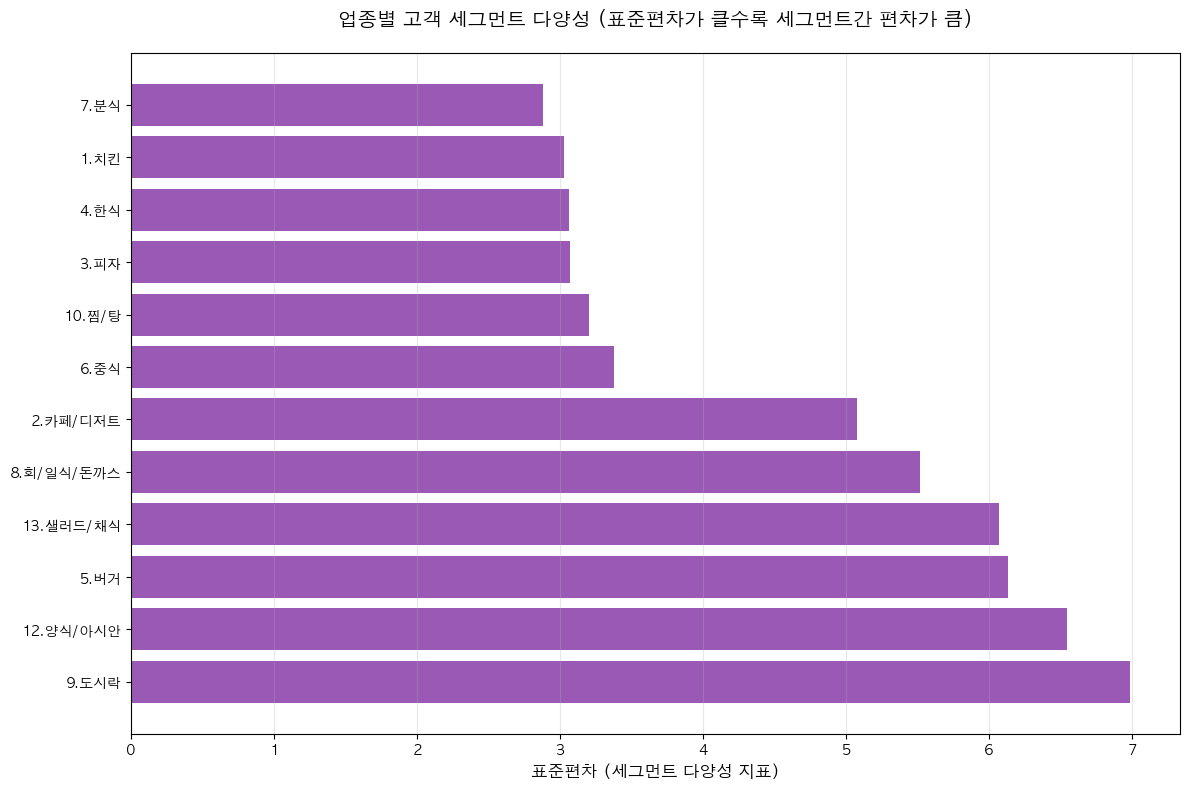

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

y_pos = np.arange(len(diversity_by_cat))

ax.barh(y_pos, diversity_by_cat['표준편차'], color='#9B59B6')
ax.set_yticks(y_pos)
ax.set_yticklabels(diversity_by_cat['업종'])
ax.set_xlabel('표준편차 (세그먼트 다양성 지표)', fontsize=12)
ax.set_title('업종별 고객 세그먼트 다양성 (표준편차가 클수록 세그먼트간 편차가 큼)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. 종합 통계

In [17]:
segment_count = df_seg.groupby(['성별', '연령대']).size().reset_index(name='관측치수')
segment_count_pivot = segment_count.pivot(index='성별', columns='연령대', values='관측치수')
segment_count_pivot = segment_count_pivot[age_order]

segment_count_pivot

연령대,10~20대,30대,40대,50대,60대이상
성별,,,,,
남성,77829,80254,80936,81466,80709
여성,77738,79890,80428,80770,80207


In [18]:
top3_segments = df_main.groupby('업종').apply(
    lambda x: x.nlargest(3, '평균_비율')[['성별', '연령대', '평균_비율']]
).reset_index()

top3_segments[['업종', '성별', '연령대', '평균_비율']].head(20)

,업종,성별,연령대,평균_비율
0,1.치킨,남성,50대,15.322197
1,1.치킨,남성,30대,13.070178
2,1.치킨,남성,40대,12.743917
3,10.찜/탕,남성,30대,14.292653
4,10.찜/탕,남성,50대,14.284695
5,10.찜/탕,남성,10~20대,12.674909
6,12.양식/아시안,여성,10~20대,20.186204
7,12.양식/아시안,여성,30대,19.317172
8,12.양식/아시안,남성,30대,15.689135
9,13.샐러드/채식,여성,10~20대,19.202238


## 9. 주요 발견사항

본 분석을 통해 도출된 주요 인사이트:

1. **업종별 성별 차이**: 카페/디저트, 샐러드/채식 등은 여성 고객 비중이 높으며, 치킨, 회/일식 등은 남성 비중이 상대적으로 높음

2. **연령대별 선호 업종**: 10~20대는 카페/디저트, 버거 등 선호, 40~50대는 한식, 중식 등 전통 음식 선호 경향

3. **세그먼트 다양성**: 한식은 모든 성별×연령대에서 고르게 분포하여 세그먼트 다양성이 낮은 반면, 특정 업종은 세그먼트에 집중되어 다양성이 높음

4. **타겟 세그먼트**: 각 업종별로 핵심 타겟 세그먼트가 명확하게 구분되며, 이는 마케팅 및 정책 수립 시 활용 가능

## 14. 업종별 세그먼트 크기 분석

In [19]:
# 각 업종별 세그먼트 관측치 수
segment_size = df_main.groupby(['업종', '성별', '연령대'])['관측치수'].sum().reset_index()
total_by_category = segment_size.groupby('업종')['관측치수'].sum().reset_index()
total_by_category.columns = ['업종', '총_관측치수']
total_by_category = total_by_category.sort_values('총_관측치수', ascending=False)

total_by_category

,업종,총_관측치수
6,4.한식,290358
4,2.카페/디저트,153495
10,8.회/일식/돈까스,44780
2,12.양식/아시안,38769
0,1.치킨,29004
9,7.분식,28223
8,6.중식,22573
5,3.피자,10883
3,13.샐러드/채식,6101
7,5.버거,5933


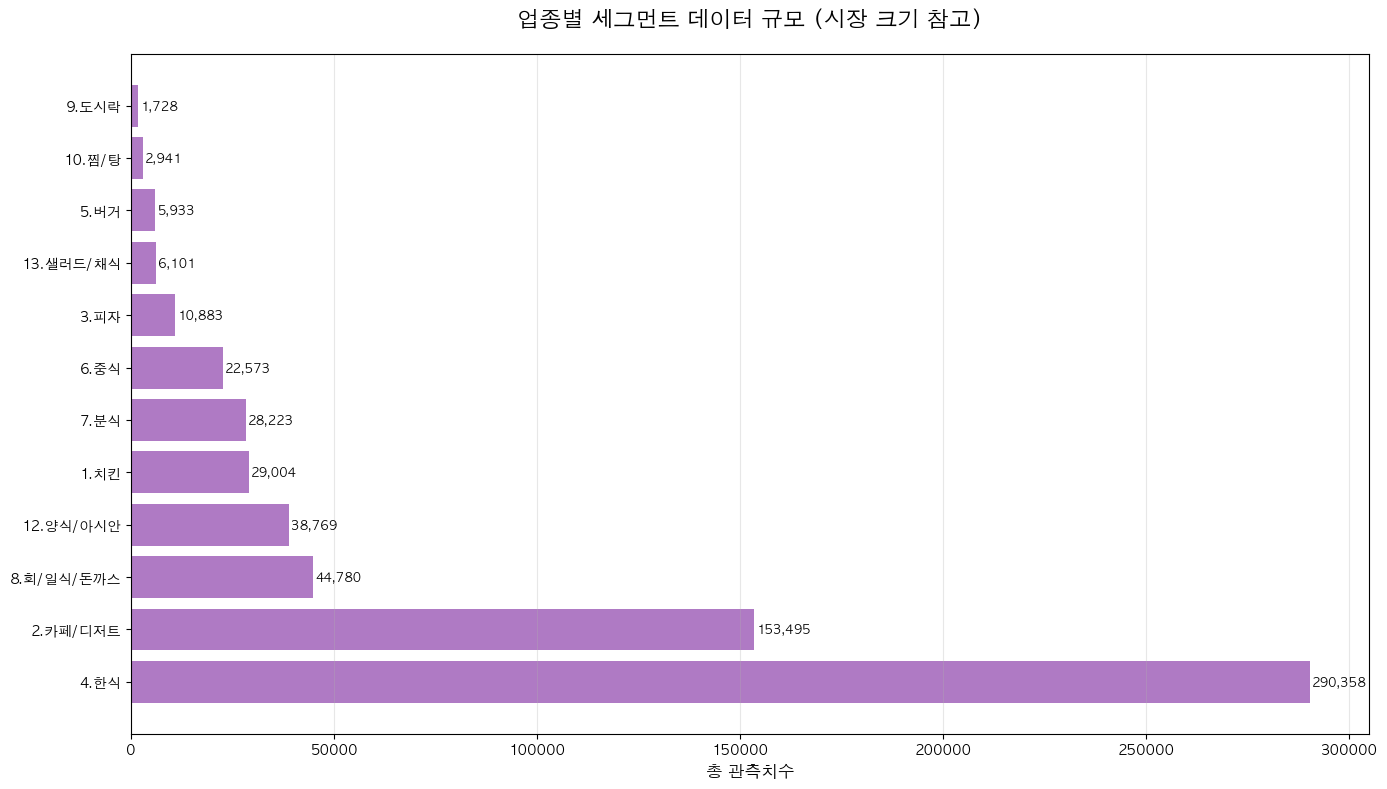

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))

y_pos = np.arange(len(total_by_category))
ax.barh(y_pos, total_by_category['총_관측치수'], color='#9B59B6', alpha=0.8)
ax.set_yticks(y_pos)
ax.set_yticklabels(total_by_category['업종'], fontsize=10)
ax.set_xlabel('총 관측치수', fontsize=12)
ax.set_title('업종별 세그먼트 데이터 규모 (시장 크기 참고)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

for i, val in enumerate(total_by_category['총_관측치수']):
    ax.text(val + 500, i, f'{val:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 15. 업종별 연령대 프로필 (레이더 차트)

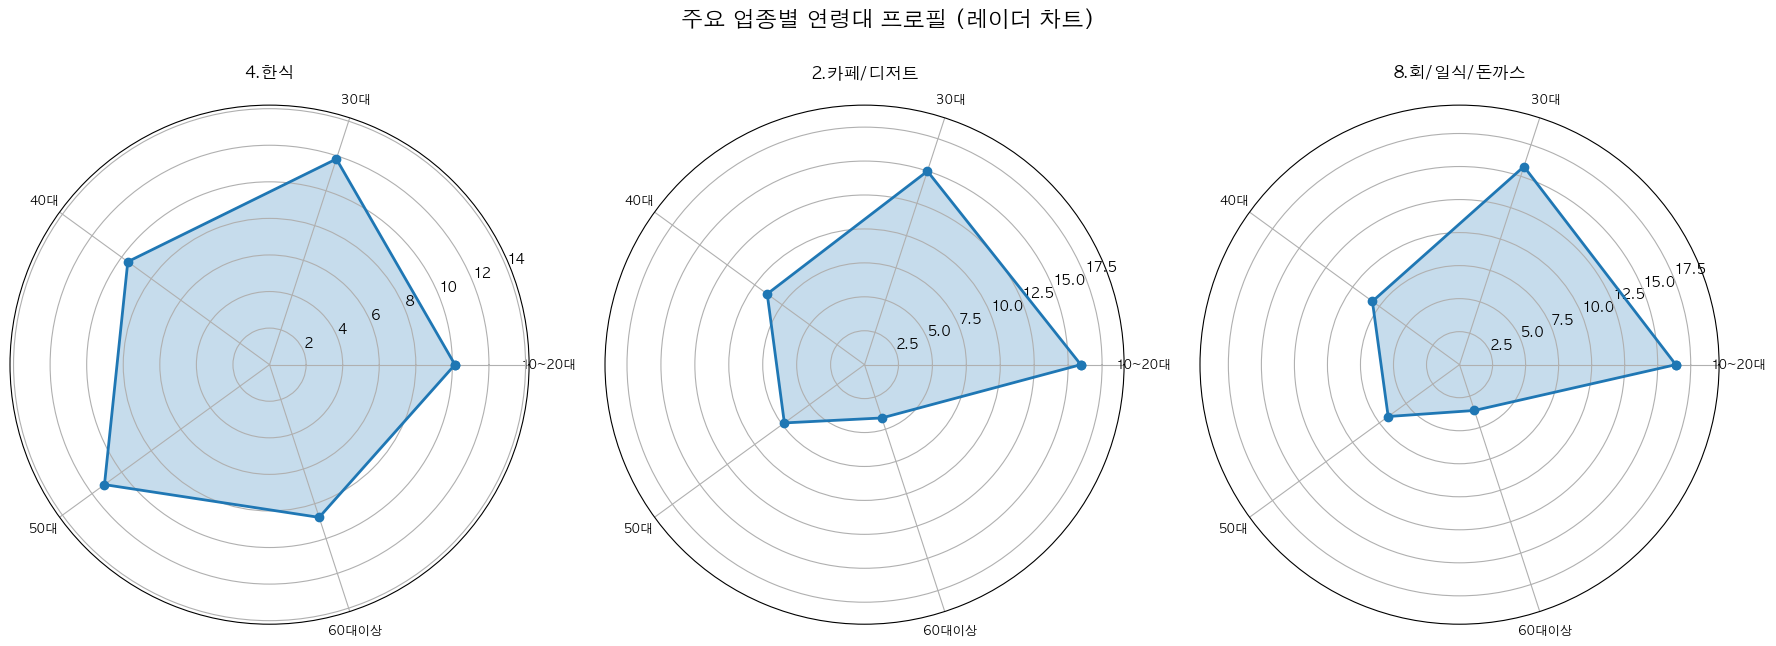

In [21]:
# 주요 업종 3개 선택하여 레이더 차트
import math

# 데이터가 많은 상위 3개 업종
top3_cats = total_by_category.head(3)['업종'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='polar'))

angles = [n / len(age_order) * 2 * math.pi for n in range(len(age_order))]
angles += angles[:1]

for idx, cat in enumerate(top3_cats):
    ax = axes[idx]
    
    values = age_pivot.loc[cat].tolist()
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=cat)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(age_order, fontsize=9)
    ax.set_ylim(0, max(values) * 1.2)
    ax.set_title(cat, fontsize=12, fontweight='bold', pad=20)
    ax.grid(True)

plt.suptitle('주요 업종별 연령대 프로필 (레이더 차트)', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

## 16. 세그먼트별 업종 다양성

In [22]:
# 각 성별×연령대 세그먼트가 얼마나 다양한 업종을 이용하는지
segment_diversity = []

for gender in ['남성', '여성']:
    for age in age_order:
        seg_data = df_main[(df_main['성별'] == gender) & (df_main['연령대'] == age)]
        
        if len(seg_data) > 0:
            # 표준편차 (다양성 지표)
            std_val = seg_data['평균_비율'].std()
            # 범위
            range_val = seg_data['평균_비율'].max() - seg_data['평균_비율'].min()
            # 상위 3개 업종이 차지하는 비율
            top3_sum = seg_data.nlargest(3, '평균_비율')['평균_비율'].sum()
            
            segment_diversity.append({
                '세그먼트': f'{gender}_{age}',
                '성별': gender,
                '연령대': age,
                '표준편차': std_val,
                '범위': range_val,
                'Top3_집중도': top3_sum
            })

df_seg_diversity = pd.DataFrame(segment_diversity)
df_seg_diversity = df_seg_diversity.sort_values('Top3_집중도', ascending=False)

df_seg_diversity

,세그먼트,성별,연령대,표준편차,범위,Top3_집중도
0,남성_10~20대,남성,10~20대,4.011951,13.904536,61.947527
5,여성_10~20대,여성,10~20대,4.461722,13.163488,58.156349
6,여성_30대,여성,30대,4.243263,12.063127,55.171480
1,남성_30대,남성,30대,1.687108,5.245664,51.199220
3,남성_50대,남성,50대,3.509667,9.704417,43.967730
2,남성_40대,남성,40대,2.444138,7.485181,40.204923
4,남성_60대이상,남성,60대이상,3.200953,9.221897,31.714425
7,여성_40대,여성,40대,1.768942,6.757488,31.510319
8,여성_50대,여성,50대,1.533881,5.326016,27.032869
9,여성_60대이상,여성,60대이상,1.359323,3.723686,17.240734


## 17. 세그먼트 비중 히트맵 (각 업종 내 세그먼트 비중)

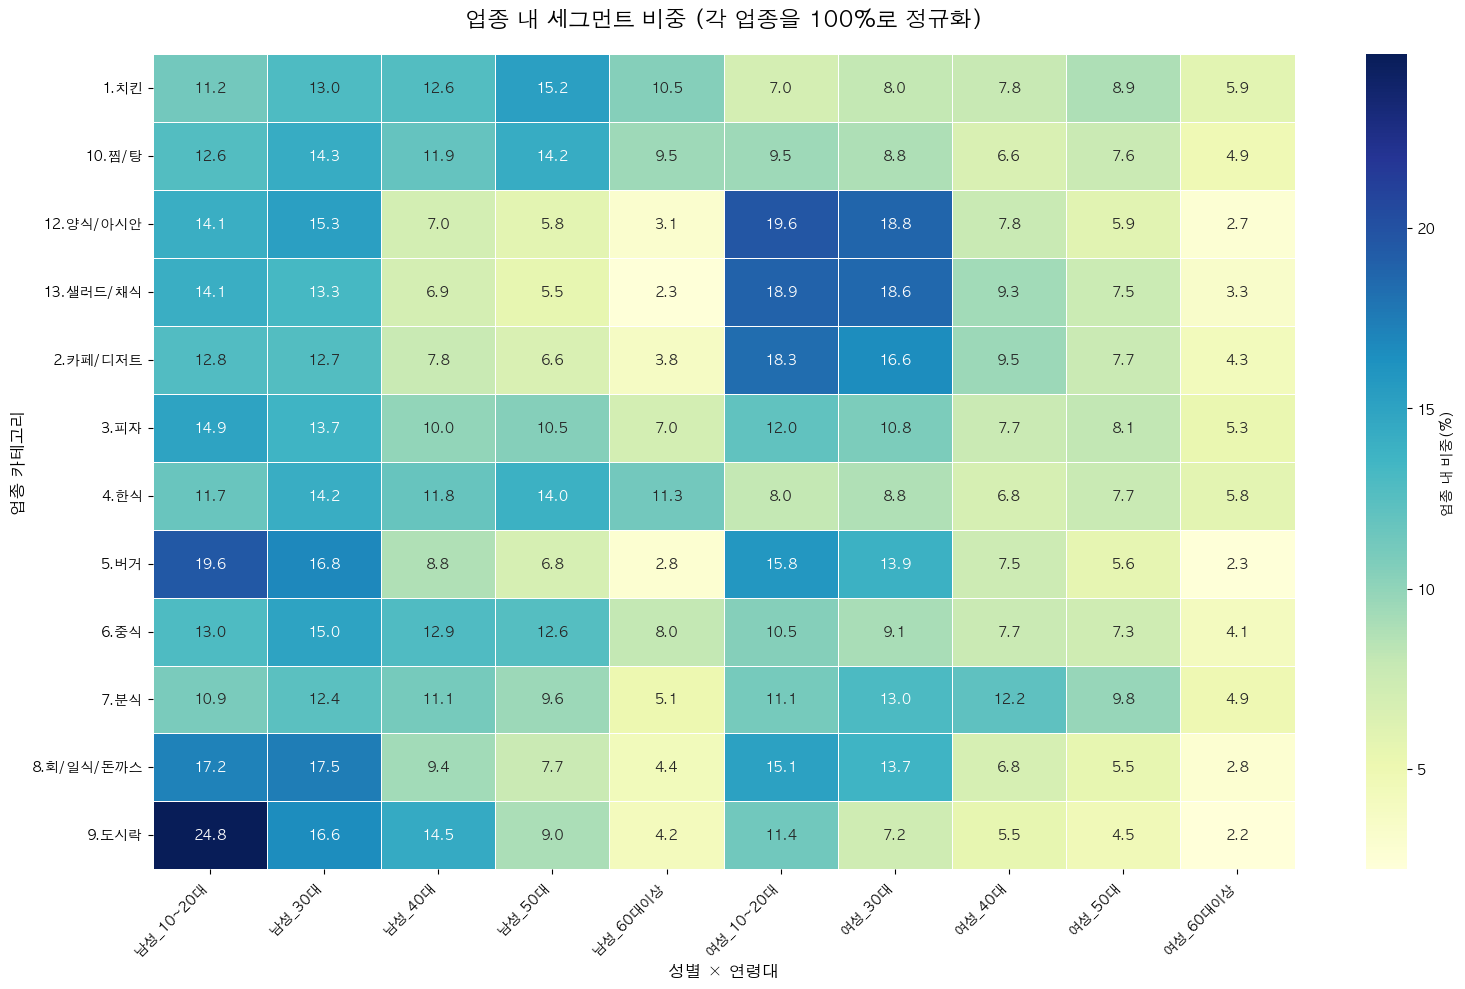

In [23]:
# 각 업종 내에서 세그먼트가 차지하는 비중을 정규화
segment_share = df_main.copy()

# 업종별로 그룹화하여 비율 합계로 나누기 (정규화)
for cat in available_categories:
    cat_mask = segment_share['업종'] == cat
    total = segment_share[cat_mask]['평균_비율'].sum()
    if total > 0:
        segment_share.loc[cat_mask, '정규화_비율'] = (segment_share.loc[cat_mask, '평균_비율'] / total) * 100

# 피벗 테이블
share_data = []
for cat in available_categories:
    cat_data = segment_share[segment_share['업종'] == cat]
    row = []
    for gender in ['남성', '여성']:
        for age in age_order:
            val = cat_data[(cat_data['성별'] == gender) & (cat_data['연령대'] == age)]['정규화_비율']
            row.append(val.values[0] if len(val) > 0 else 0)
    share_data.append(row)

share_df = pd.DataFrame(share_data, columns=gender_age_labels, index=available_categories)

fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(share_df, annot=True, fmt='.1f', cmap='YlGnBu', 
            cbar_kws={'label': '업종 내 비중(%)'}, ax=ax, linewidths=0.5)

ax.set_title('업종 내 세그먼트 비중 (각 업종을 100%로 정규화)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('성별 × 연령대', fontsize=12)
ax.set_ylabel('업종 카테고리', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 18. 마케팅 전략 매트릭스

In [24]:
# 업종별 시장 크기 vs 세그먼트 집중도
marketing_matrix = []

for cat in available_categories:
    cat_segment = segment_share[segment_share['업종'] == cat]
    cat_total = total_by_category[total_by_category['업종'] == cat]
    
    market_size = cat_total['총_관측치수'].values[0] if len(cat_total) > 0 else 0
    concentration = diversity_by_cat[diversity_by_cat['업종'] == cat]['표준편차'].values[0] if len(diversity_by_cat[diversity_by_cat['업종'] == cat]) > 0 else 0
    
    # 주력 세그먼트 비중
    max_share = cat_segment['정규화_비율'].max() if len(cat_segment) > 0 else 0
    
    marketing_matrix.append({
        '업종': cat,
        '시장크기': market_size,
        '세그먼트_다양성': concentration,
        '주력세그먼트_비중': max_share
    })

df_marketing = pd.DataFrame(marketing_matrix)
df_marketing

,업종,시장크기,세그먼트_다양성,주력세그먼트_비중
0,1.치킨,29004,3.023744,15.202823
1,10.찜/탕,2941,3.203935,14.250664
2,12.양식/아시안,38769,6.545461,19.632842
3,13.샐러드/채식,6101,6.069601,18.939668
4,2.카페/디저트,153495,5.076201,18.324225
5,3.피자,10883,3.071635,14.943277
6,4.한식,290358,3.059718,14.164426
7,5.버거,5933,6.134663,19.604863
8,6.중식,22573,3.376032,14.952259
9,7.분식,28223,2.876970,13.004136


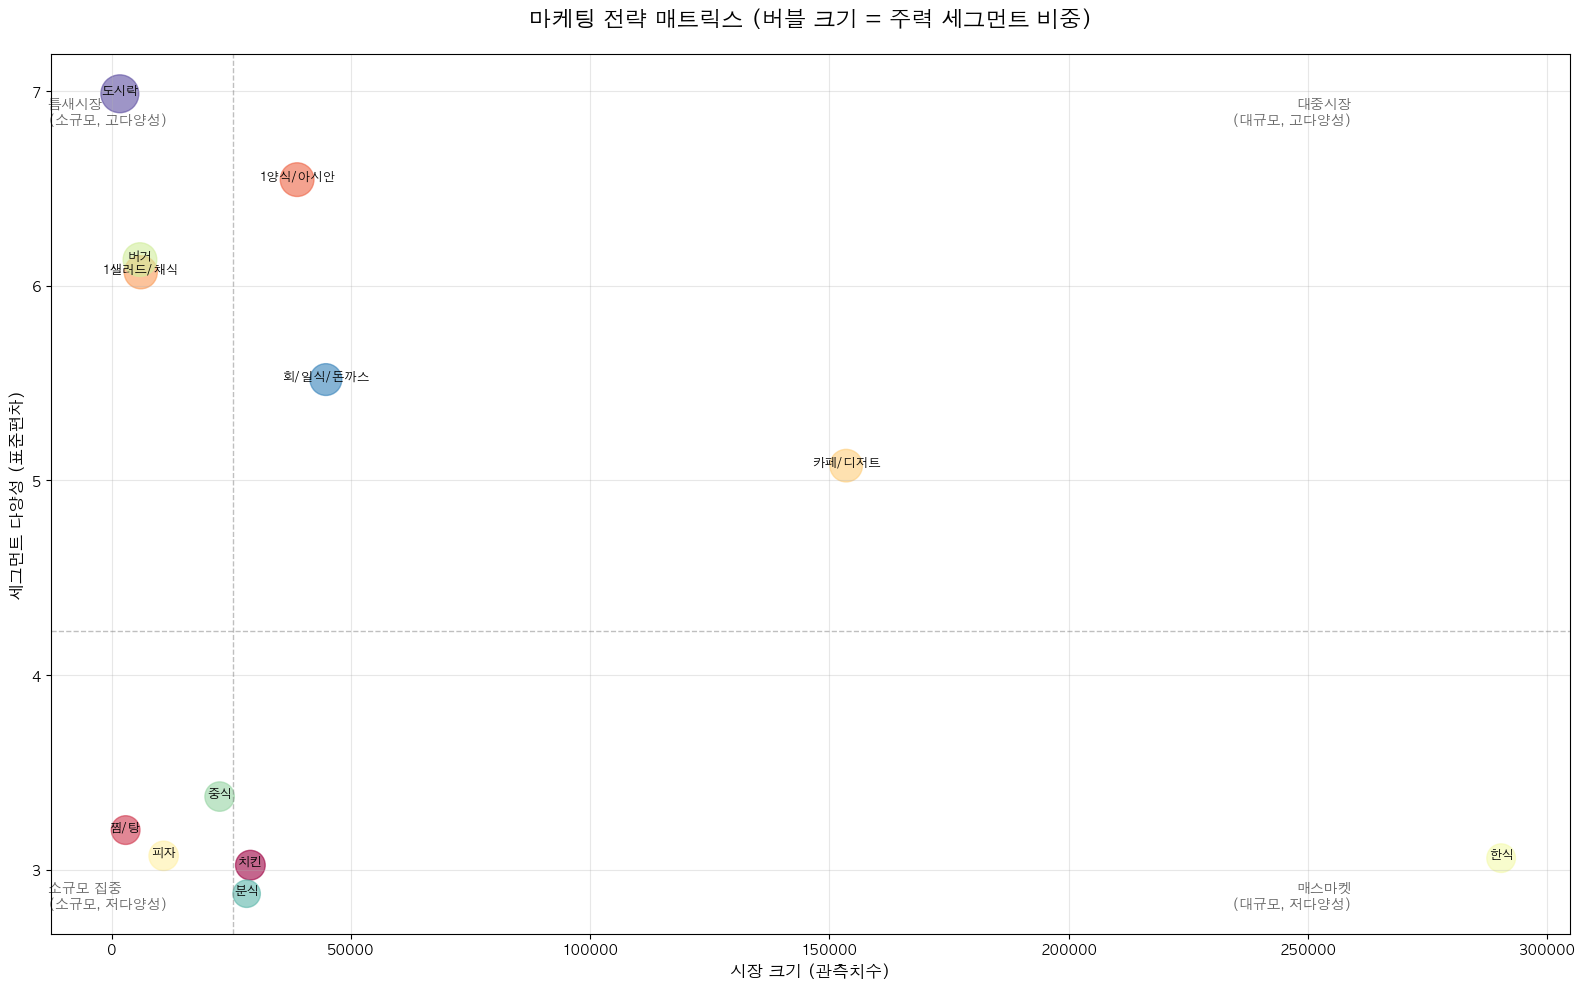

In [25]:
fig, ax = plt.subplots(figsize=(16, 10))

scatter = ax.scatter(df_marketing['시장크기'], 
                     df_marketing['세그먼트_다양성'],
                     s=df_marketing['주력세그먼트_비중'] * 30,
                     alpha=0.6,
                     c=range(len(df_marketing)),
                     cmap='Spectral')

for idx, row in df_marketing.iterrows():
    ax.annotate(row['업종'].replace('1.', '').replace('2.', '').replace('3.', '').replace('4.', '').replace('5.', '').replace('6.', '').replace('7.', '').replace('8.', '').replace('9.', '').replace('10.', '').replace('11.', '').replace('12.', '').replace('13.', ''),
                (row['시장크기'], row['세그먼트_다양성']),
                fontsize=9, ha='center')

ax.axhline(y=df_marketing['세그먼트_다양성'].median(), color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(x=df_marketing['시장크기'].median(), color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax.set_xlabel('시장 크기 (관측치수)', fontsize=12)
ax.set_ylabel('세그먼트 다양성 (표준편차)', fontsize=12)
ax.set_title('마케팅 전략 매트릭스 (버블 크기 = 주력 세그먼트 비중)', fontsize=16, fontweight='bold', pad=20)

ax.text(ax.get_xlim()[0] * 1.05, ax.get_ylim()[1] * 0.95, '틈새시장\n(소규모, 고다양성)', fontsize=10, style='italic', alpha=0.6, ha='left')
ax.text(ax.get_xlim()[1] * 0.85, ax.get_ylim()[1] * 0.95, '대중시장\n(대규모, 고다양성)', fontsize=10, style='italic', alpha=0.6, ha='right')
ax.text(ax.get_xlim()[0] * 1.05, ax.get_ylim()[0] * 1.05, '소규모 집중\n(소규모, 저다양성)', fontsize=10, style='italic', alpha=0.6, ha='left')
ax.text(ax.get_xlim()[1] * 0.85, ax.get_ylim()[0] * 1.05, '매스마켓\n(대규모, 저다양성)', fontsize=10, style='italic', alpha=0.6, ha='right')

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 20. 마케팅 활용 인사이트 요약

### 시각화별 활용 방안

1. **히트맵 (섹션 3)**: 업종별로 어느 성별×연령대 조합이 높은 비중을 차지하는지 한눈에 파악
   - 활용: 타겟 고객층 식별, 광고 타게팅 설정

2. **성별 편중도 (섹션 11)**: 각 업종이 남성/여성 중 어느 쪽에 더 집중되어 있는지
   - 활용: 마케팅 메시지 톤앤매너 결정, 모델 선정

3. **연령대 집중도 (섹션 12)**: 특정 연령대에 얼마나 집중되어 있는지
   - 활용: 제품 라인업 구성, 가격대 설정

4. **포지셔닝 맵 (섹션 13)**: 업종 간 상대적 위치 비교
   - 활용: 경쟁사 분석, 차별화 전략 수립

5. **주력 타겟 세그먼트 (섹션 10)**: 각 업종의 가장 중요한 고객층
   - 활용: 핵심 타겟 페르소나 설정

6. **세그먼트 비중 히트맵 (섹션 17)**: 업종 내부에서 각 세그먼트의 상대적 중요도
   - 활용: 세분화된 마케팅 예산 배분

7. **마케팅 전략 매트릭스 (섹션 18)**: 시장 크기와 다양성을 동시에 고려한 전략 수립
   - 활용: 시장 진입 전략, 자원 배분 우선순위

8. **고객 페르소나 요약 (섹션 19)**: 업종별 핵심 고객 특성을 한 눈에
   - 활용: 마케팅 기획서, 사업 계획서 작성

## 23. 업종별 세그먼트 분포 (바이올린 플롯)

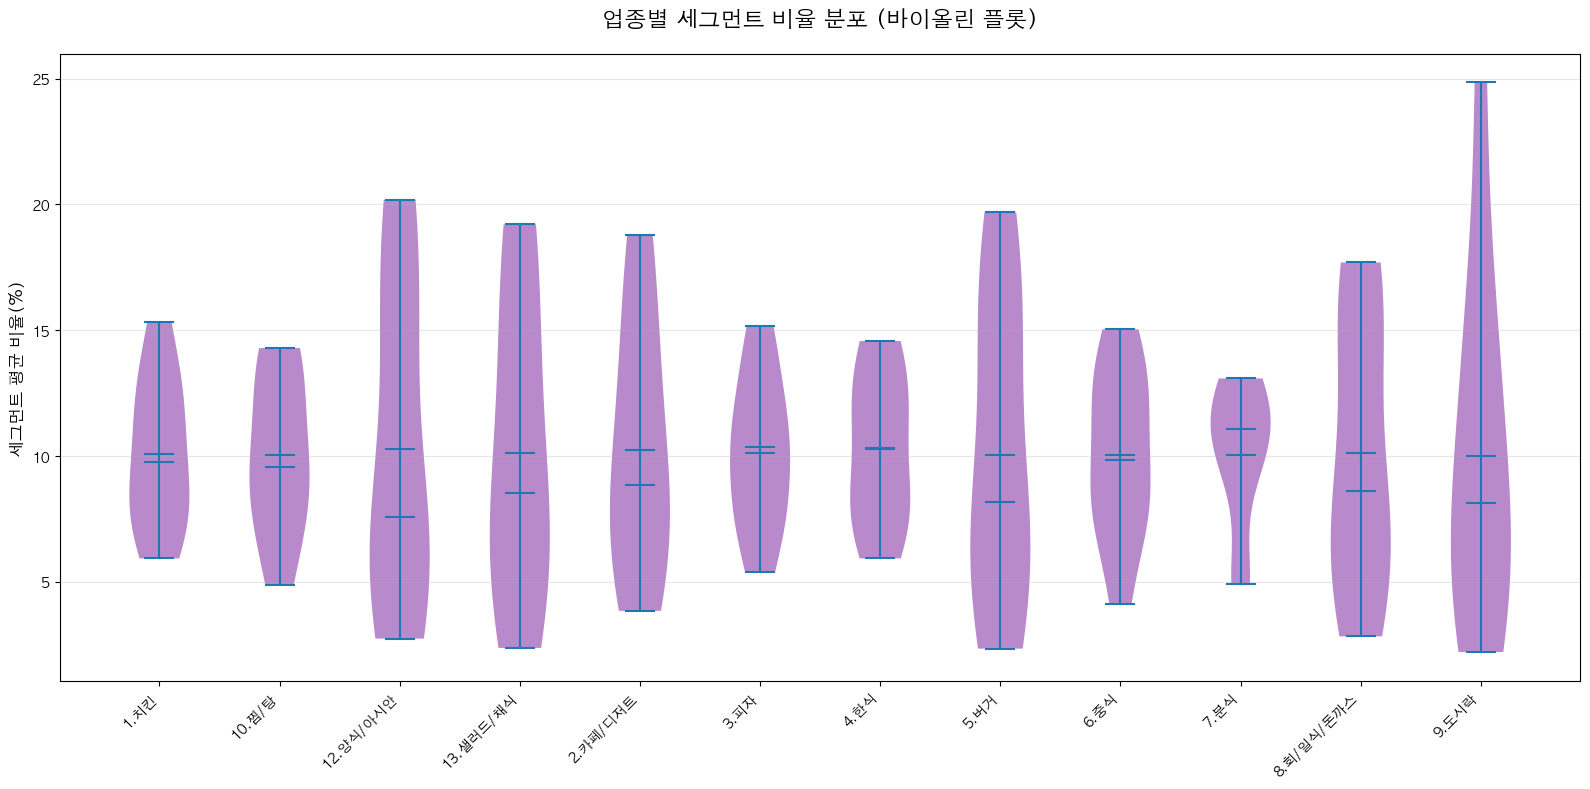

In [26]:
# 각 업종의 세그먼트 비율 분포
fig, ax = plt.subplots(figsize=(16, 8))

# 데이터 준비
violin_data = []
violin_labels = []

for cat in available_categories:
    cat_data = df_main[df_main['업종'] == cat]['평균_비율'].values
    if len(cat_data) > 0:
        violin_data.append(cat_data)
        violin_labels.append(cat)

parts = ax.violinplot(violin_data, positions=range(len(violin_labels)), 
                      showmeans=True, showmedians=True)

for pc in parts['bodies']:
    pc.set_facecolor('#9B59B6')
    pc.set_alpha(0.7)

ax.set_xticks(range(len(violin_labels)))
ax.set_xticklabels(violin_labels, rotation=45, ha='right')
ax.set_ylabel('세그먼트 평균 비율(%)', fontsize=12)
ax.set_title('업종별 세그먼트 비율 분포 (바이올린 플롯)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 28. 업종 3D 포지셔닝 (시장크기 × 성별편중 × 연령집중)

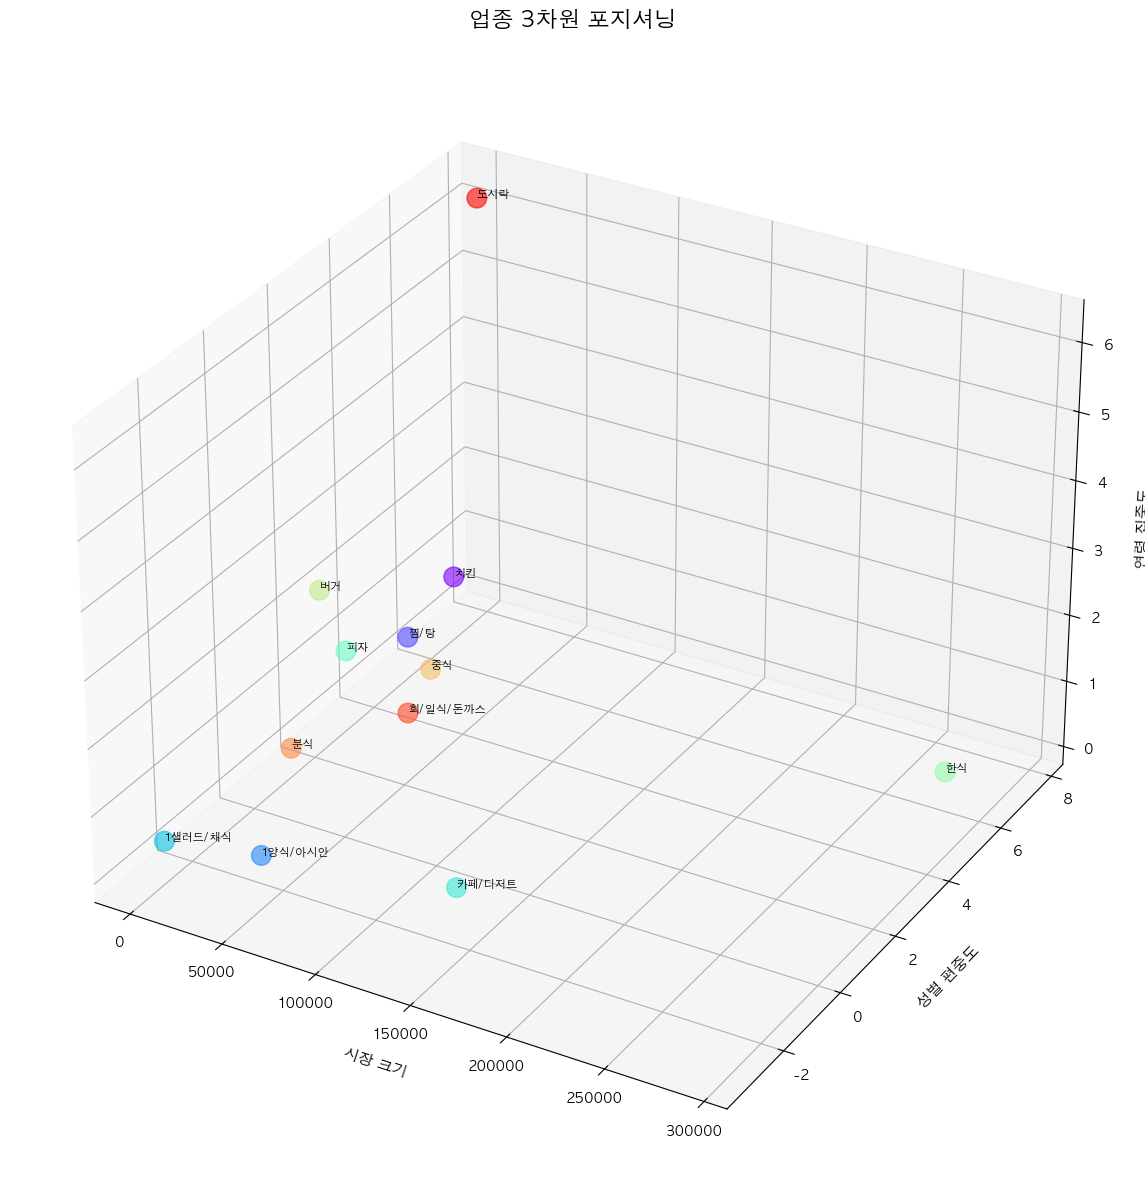

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# 데이터 준비
plot_data = []
for cat in available_categories:
    # 시장 크기
    market = total_by_category[total_by_category['업종'] == cat]['총_관측치수'].values[0] if len(total_by_category[total_by_category['업종'] == cat]) > 0 else 0
    
    # 성별 편중도
    if cat in gender_pivot.index:
        gender_bias_val = gender_pivot.loc[cat, '남성'] - gender_pivot.loc[cat, '여성']
    else:
        gender_bias_val = 0
    
    # 연령 집중도
    if cat in age_pivot.index:
        age_concentration_val = age_pivot.loc[cat].max() - age_pivot.loc[cat].nlargest(2).iloc[-1]
    else:
        age_concentration_val = 0
    
    plot_data.append({
        '업종': cat,
        '시장크기': market,
        '성별편중': gender_bias_val,
        '연령집중': age_concentration_val
    })

df_3d = pd.DataFrame(plot_data)

scatter = ax.scatter(df_3d['시장크기'], df_3d['성별편중'], df_3d['연령집중'],
                     c=range(len(df_3d)), cmap='rainbow', s=200, alpha=0.6)

for idx, row in df_3d.iterrows():
    ax.text(row['시장크기'], row['성별편중'], row['연령집중'],
           row['업종'].replace('1.', '').replace('2.', '').replace('3.', '').replace('4.', '').replace('5.', '').replace('6.', '').replace('7.', '').replace('8.', '').replace('9.', '').replace('10.', '').replace('11.', '').replace('12.', '').replace('13.', ''),
           fontsize=8)

ax.set_xlabel('시장 크기', fontsize=11, labelpad=10)
ax.set_ylabel('성별 편중도', fontsize=11, labelpad=10)
ax.set_zlabel('연령 집중도', fontsize=11, labelpad=10)
ax.set_title('업종 3차원 포지셔닝', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()